# Decision Tree



### 1. What is a Decision Tree, and how does it work?
A Decision Tree is a supervised machine learning algorithm used for classification and regression. It splits the dataset into subsets based on the value of input features. At each internal node, the algorithm selects a feature that best separates the data. Leaves represent the final output.

---

### 2. What are impurity measures in Decision Trees?
Impurity measures quantify how mixed the target classes are at a node. Common impurity measures:
- **Gini Impurity**
- **Entropy**

Lower impurity means better classification.

---

### 3. What is the mathematical formula for Gini Impurity?
\[
Gini = 1 - \sum_{i=1}^{C} p_i^2
\]
Where:
- \( p_i \) = Probability of class *i*
- *C* = Number of classes

---

### 4. What is the mathematical formula for Entropy?
\[
Entropy = -\sum_{i=1}^{C} p_i \cdot \log_2(p_i)
\]
Where:
- \( p_i \) = Probability of class *i*
- *C* = Number of classes

---

### 5. What is Information Gain, and how is it used in Decision Trees?
Information Gain (IG) measures the reduction in impurity after a dataset is split on a feature.

\[
IG = Entropy_{parent} - \sum_{i} \frac{n_i}{n} \cdot Entropy_{child_i}
\]

Decision Trees use IG to select the best feature at each split.

---

### 6. What is the difference between Gini Impurity and Entropy?
- **Gini** is simpler and faster to compute.
- **Entropy** uses logarithms and is more theoretically aligned with information theory.
- Both perform similarly in practice.

---

### 7. What is the mathematical explanation behind Decision Trees?
A Decision Tree recursively partitions the input space:
- Choose the best feature \( f \) to split using a criterion (e.g., Gini or Entropy).
- Compute impurity before and after the split.
- Maximize Information Gain (or minimize impurity).
- Repeat for child nodes until stopping conditions are met (e.g., pure node or max depth).

---

### 8. What is Pre-Pruning in Decision Trees?
Pre-Pruning (early stopping) halts the tree growth early:
- Set limits like max depth, min samples per leaf, or min impurity decrease.
- Avoids overfitting by preventing the tree from growing too complex.

---

### 9. What is Post-Pruning in Decision Trees?
Post-Pruning removes branches from a fully grown tree:
- Train the full tree first.
- Prune branches that have little importance (based on validation accuracy or complexity).
- Helps reduce overfitting after training.

---

### 10. What is the difference between Pre-Pruning and Post-Pruning?
| Feature         | Pre-Pruning                  | Post-Pruning                   |
|----------------|------------------------------|--------------------------------|
| Timing         | During training               | After full training            |
| Control        | Stops tree from growing too big| Removes less useful branches   |
| Overfitting    | Avoided early                 | Reduced afterward              |
| Performance    | May miss useful splits        | More accurate with validation  |

---

### 11. What is a Decision Tree Regressor?
A Decision Tree Regressor predicts continuous values:
- Splits data to minimize variance (not classification impurity).
- Leaf nodes contain mean of target values.

---

### 12. What are the advantages and disadvantages of Decision Trees?

**Advantages:**
- Easy to interpret and visualize
- Handles numerical and categorical data
- No need for feature scaling

**Disadvantages:**
- Prone to overfitting
- Unstable to small data changes
- Biased towards features with more levels

---

### 13. How does a Decision Tree handle missing values?
- **Skipping**: Ignore missing values during split evaluation.
- **Imputation**: Fill missing values with mean/mode.
- **Surrogate splits**: Use backup features when the main splitting feature is missing.

---

### 14. How does a Decision Tree handle categorical features?
- It treats each category as a separate split.
- Can create binary splits (e.g., A vs. not A) or multi-way splits.
- Label encoding or one-hot encoding is often used in implementation.

---

### 15. What are some real-world applications of Decision Trees?
- **Medical Diagnosis** (e.g., predicting disease risk)
- **Credit Scoring** (loan approval)
- **Marketing** (customer segmentation)
- **Fraud Detection**
- **Recommendation Systems**

---


In [1]:
# 16. Train a Decision Tree Classifier on the Iris dataset and print the model accuracy
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
# 17. Train a Decision Tree Classifier using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

print("Feature Importances (Gini):", clf_gini.feature_importances_)


Feature Importances (Gini): [0.03822004 0.         0.87415353 0.08762643]


In [3]:
# 18. Train a Decision Tree Classifier using Entropy and print model accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Accuracy (Entropy): 0.9777777777777777


In [4]:
# 19. Train a Decision Tree Regressor on the housing dataset and evaluate with MSE
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
Xh_train, Xh_test, yh_train, yh_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(Xh_train, yh_train)
yh_pred = regressor.predict(Xh_test)

print("MSE:", mean_squared_error(yh_test, yh_pred))


MSE: 0.5237738075041504


In [5]:
# 20. Train a Decision Tree Classifier and visualize the tree using graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                           class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph.view()


'iris_tree.pdf'

In [6]:
# 21. Train Decision Tree with max_depth=3 and compare with full tree
clf_shallow = DecisionTreeClassifier(max_depth=3)
clf_shallow.fit(X_train, y_train)
y_pred_shallow = clf_shallow.predict(X_test)

print("Shallow Tree Accuracy:", accuracy_score(y_test, y_pred_shallow))
print("Full Tree Accuracy:", accuracy_score(y_test, y_pred))


Shallow Tree Accuracy: 1.0
Full Tree Accuracy: 1.0


In [7]:
# 22. Train Decision Tree with min_samples_split=5 and compare with default
clf_split = DecisionTreeClassifier(min_samples_split=5)
clf_split.fit(X_train, y_train)
y_pred_split = clf_split.predict(X_test)

print("min_samples_split=5 Accuracy:", accuracy_score(y_test, y_pred_split))
print("Default Tree Accuracy:", accuracy_score(y_test, y_pred))


min_samples_split=5 Accuracy: 1.0
Default Tree Accuracy: 1.0


In [8]:
# 23. Apply feature scaling before training and compare accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, iris.target, test_size=0.3, random_state=42)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)

print("Accuracy with Scaling:", accuracy_score(y_test, y_pred_scaled))


Accuracy with Scaling: 1.0


In [9]:
# 24. Train Decision Tree using One-vs-Rest (OVR) for multiclass
from sklearn.multiclass import OneVsRestClassifier

ovr_model = OneVsRestClassifier(DecisionTreeClassifier())
ovr_model.fit(X_train, y_train)
ovr_pred = ovr_model.predict(X_test)

print("OVR Accuracy:", accuracy_score(y_test, ovr_pred))


OVR Accuracy: 1.0


In [10]:
# 25. Train Decision Tree and display feature importances
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")


sepal length (cm): 0.0382
sepal width (cm): 0.0000
petal length (cm): 0.4045
petal width (cm): 0.5573


In [11]:
# 26. Train Regressor with max_depth=5 and compare with full tree
reg_limited = DecisionTreeRegressor(max_depth=5)
reg_limited.fit(Xh_train, yh_train)
pred_limited = reg_limited.predict(Xh_test)

print("MSE (max_depth=5):", mean_squared_error(yh_test, pred_limited))
print("MSE (Unrestricted):", mean_squared_error(yh_test, yh_pred))


MSE (max_depth=5): 0.5210801561811793
MSE (Unrestricted): 0.5237738075041504


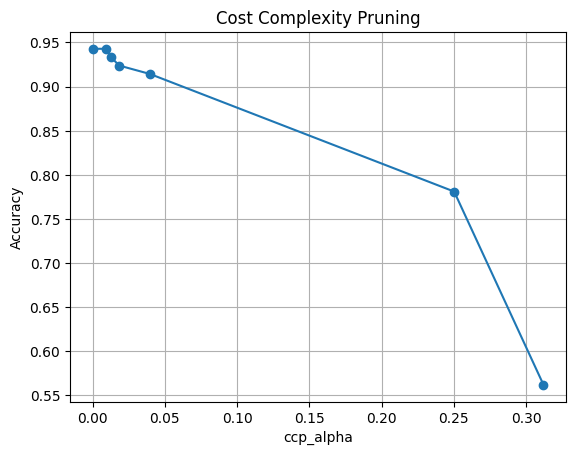

In [12]:
# 27. Train classifier, apply Cost Complexity Pruning, visualize accuracy vs alpha
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

accuracies = []
for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(clf_pruned, X_train, y_train, cv=5)
    accuracies.append(scores.mean())

plt.plot(ccp_alphas, accuracies, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Cost Complexity Pruning")
plt.grid(True)
plt.show()


In [13]:
# 28. Evaluate classifier using Precision, Recall, and F1-Score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



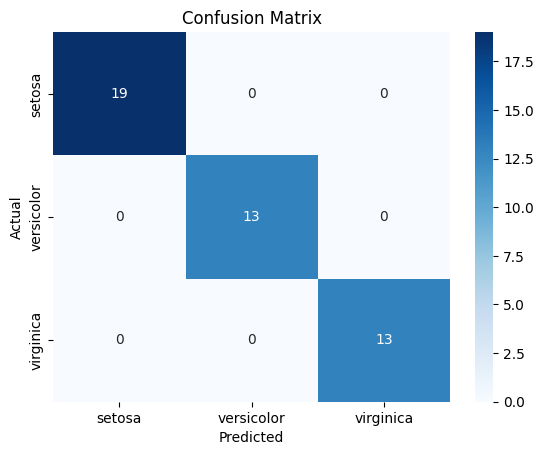

In [14]:
# 29. Visualize confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# 30. Use GridSearchCV to find best max_depth and min_samples_split
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9428571428571428
